## Loading the data

In [43]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [44]:
# Download data here : https://downloads.viscoda.com/research/roadsaw/log.txt

train_data = tf.keras.utils.image_dataset_from_directory('/Users/kevinsam/Desktop/Unif/Master/ThesisWheelchair/DATA/RoadSaW/RoadSaW-075_s/train')
val_data = tf.keras.utils.image_dataset_from_directory('/Users/kevinsam/Desktop/Unif/Master/ThesisWheelchair/DATA/RoadSaW/RoadSaW-075_s/validation')
test_data = tf.keras.utils.image_dataset_from_directory('/Users/kevinsam/Desktop/Unif/Master/ThesisWheelchair/DATA/RoadSaW/RoadSaW-075_s/test')

Found 15516 files belonging to 12 classes.
Found 4944 files belonging to 12 classes.
Found 1716 files belonging to 12 classes.


In [45]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Define image data generators
# train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# # Load and preprocess the training data
# train_generator = train_datagen.flow_from_directory(
#     '/Users/kevinsam/Desktop/Unif/Master/ThesisWheelchair/DATA/RoadSaW/RoadSaW-075_s/train',
#     target_size=(224, 224),  # adjust based on your model requirements
#     batch_size=32,
#     class_mode='categorical',
#     subset='training'
# )

# # Load and preprocess the validation data
# validation_generator = train_datagen.flow_from_directory(
#     '/Users/kevinsam/Desktop/Unif/Master/ThesisWheelchair/DATA/RoadSaW/RoadSaW-075_s/validation',
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='categorical',
#     subset='validation'
# )


In [46]:
data_iterator = train_data.as_numpy_iterator()

In [47]:
batch = data_iterator.next()

In [48]:
batch[1].shape

(32,)

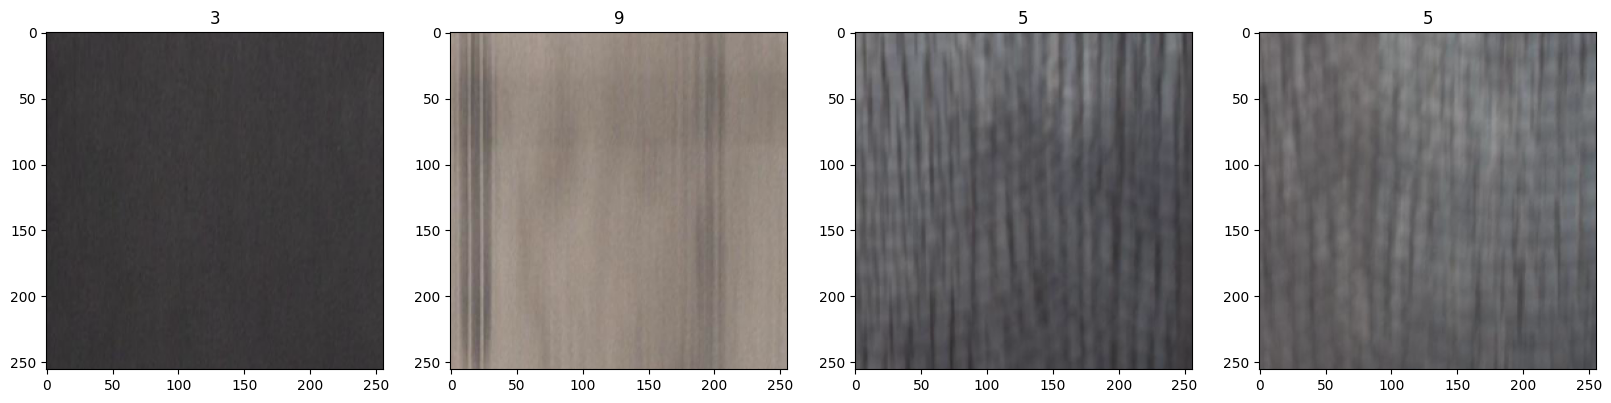

In [49]:
fig, ax = plt.subplots(ncols=4,figsize =(20,20))

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### Scale the data

In [51]:
train_data = train_data.map(lambda x,y: (x/255,tf.one_hot(y, 12)))
val_data = val_data.map(lambda x,y: (x/255,tf.one_hot(y, 12)))
test_data = test_data.map(lambda x,y: (x/255,tf.one_hot(y, 12)))

In [52]:
scaled_iterator = train_data.as_numpy_iterator()

In [53]:
scaled_iterator.next()[0].min()

0.12765396

### Building CNN

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense , Dropout
from tensorflow.keras import regularizers

# Create a sequential model
model = Sequential()

# Add convolutional layers with L2 regularization
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3), kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D((2, 2)))

# Flatten the output and add dense layers with L2 regularization
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(12, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))  # 12 classes in this case

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



### Training the model

In [59]:
logdir = 'logs'

In [60]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [69]:
hist2 = model.fit(train_data, epochs=10, validation_data=val_data,callbacks = [tensorboard_callback])

Epoch 1/10


485/485 [==============================] - 124s 254ms/step - loss: 2.5477 - accuracy: 0.2956 - val_loss: 2.2409 - val_accuracy: 0.3958
Epoch 2/10
485/485 [==============================] - 124s 254ms/step - loss: 1.9973 - accuracy: 0.4200 - val_loss: 2.0235 - val_accuracy: 0.4731
Epoch 3/10
485/485 [==============================] - 123s 253ms/step - loss: 1.8859 - accuracy: 0.4511 - val_loss: 1.8574 - val_accuracy: 0.4713
Epoch 4/10
485/485 [==============================] - 123s 253ms/step - loss: 1.8010 - accuracy: 0.4631 - val_loss: 1.8151 - val_accuracy: 0.4747
Epoch 5/10
485/485 [==============================] - 123s 252ms/step - loss: 1.7577 - accuracy: 0.4811 - val_loss: 1.8042 - val_accuracy: 0.5101
Epoch 6/10
485/485 [==============================] - 122s 252ms/step - loss: 1.7268 - accuracy: 0.4902 - val_loss: 1.8980 - val_accuracy: 0.4832
Epoch 7/10
485/485 [==============================] - 122s 251ms/step - loss: 1.7085 - accuracy: 0.4908 - val_loss: 1.8280 - val_accura

In [70]:
hist2.history

{'loss': [2.5476620197296143,
  1.9973069429397583,
  1.8858788013458252,
  1.8010094165802002,
  1.7577465772628784,
  1.7268447875976562,
  1.708526611328125,
  1.6884276866912842,
  1.6643846035003662,
  1.6428427696228027],
 'accuracy': [0.2955658733844757,
  0.4199535846710205,
  0.451147198677063,
  0.4631348252296448,
  0.48105180263519287,
  0.4902036488056183,
  0.4908481538295746,
  0.4945862293243408,
  0.5046404004096985,
  0.5127609968185425],
 'val_loss': [2.2408580780029297,
  2.0235042572021484,
  1.8574244976043701,
  1.8151326179504395,
  1.804229497909546,
  1.8979852199554443,
  1.828019380569458,
  1.7460651397705078,
  1.8800493478775024,
  1.777409315109253],
 'val_accuracy': [0.3958333432674408,
  0.4730986952781677,
  0.4712783098220825,
  0.47471684217453003,
  0.5101132392883301,
  0.4832119643688202,
  0.5026294589042664,
  0.5228559970855713,
  0.5024271607398987,
  0.5151699185371399]}

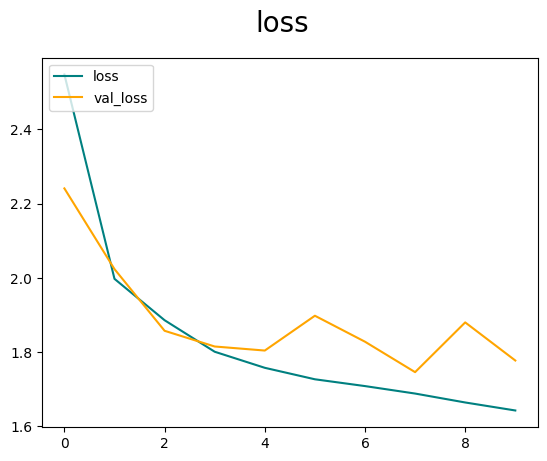

In [71]:
fig = plt.figure()
plt.plot(hist2.history['loss'],color='teal',label='loss')
plt.plot(hist2.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Model Evaluation

In [66]:
from tensorflow.keras.metrics import Precision,Recall,Accuracy

pre = Precision()
re = Recall()
acc = Accuracy()

for batch in test_data.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

print(f"Precision {pre.result().numpy()} , Recall {re.result().numpy()} , Accuracy {acc.result().numpy()}")


1/1 [==============================] - 0s 47ms/step
Precision 0.5364583134651184 , Recall 0.48018649220466614 , Accuracy 0.007187257055193186
